## **Python Implementation of Vanishing Gradient Problem**

## **Importing Libraries**

In [ ]:
# Importing Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

# Importing libraries for neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,LSTM, Dense, Embedding

# Import libraries to work with text
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

## **Creating sample text data to predict last word**


In [ ]:
# Assuming Sample text data
text =  '''Rana likes biriyani so we can understand that his favourite cuisine is Bangladeshi.
But his friend John likes pastas and cheese so we can understand that his favourite cuisine is Italian.'''

# Tokenization - assigns numbers to words as Machine learning models can't directly process text data

tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

# Convert text to sequential data to feed to RNNs network
sequences = []
for line in text.split("."):
    tokens = tokenizer.texts_to_sequences([line])[0] #[0] extracts the first (and only) list inside of another list
    for i in range(1, len(tokens)):
        sequences.append(tokens[:i+1])

# Padding sequences to pads shorter sequences with zeros at the beginning
max_length = max(len(seq) for seq in sequences)
sequences_pad = pad_sequences(sequences, maxlen=max_length, padding='pre')

In [ ]:
# Checking text converted to sequential numerical data

print('Original text :-',text)

print('\n Sequential data converted from text :- \n\n',sequences)

print('\n Sequential data after padding :-  \n\n',sequences_pad)

Original text :- Rana likes biriyani so we can understand that his favourite cuisine is Bangladeshi. 
But his friend John likes pastas and cheese so we can understand that his favourite cuisine is Italian.

 Sequential data converted from text :- 

 [[11, 2], [11, 2, 12], [11, 2, 12, 3], [11, 2, 12, 3, 4], [11, 2, 12, 3, 4, 5], [11, 2, 12, 3, 4, 5, 6], [11, 2, 12, 3, 4, 5, 6, 7], [11, 2, 12, 3, 4, 5, 6, 7, 1], [11, 2, 12, 3, 4, 5, 6, 7, 1, 8], [11, 2, 12, 3, 4, 5, 6, 7, 1, 8, 9], [11, 2, 12, 3, 4, 5, 6, 7, 1, 8, 9, 10], [11, 2, 12, 3, 4, 5, 6, 7, 1, 8, 9, 10, 13], [14, 1], [14, 1, 15], [14, 1, 15, 16], [14, 1, 15, 16, 2], [14, 1, 15, 16, 2, 17], [14, 1, 15, 16, 2, 17, 18], [14, 1, 15, 16, 2, 17, 18, 19], [14, 1, 15, 16, 2, 17, 18, 19, 3], [14, 1, 15, 16, 2, 17, 18, 19, 3, 4], [14, 1, 15, 16, 2, 17, 18, 19, 3, 4, 5], [14, 1, 15, 16, 2, 17, 18, 19, 3, 4, 5, 6], [14, 1, 15, 16, 2, 17, 18, 19, 3, 4, 5, 6, 7], [14, 1, 15, 16, 2, 17, 18, 19, 3, 4, 5, 6, 7, 1], [14, 1, 15, 16, 2, 17, 18, 19, 

## **Splitting data into input & output**

In [ ]:
# Split input (X) and output (y)
X, y = sequences_pad[:, :-1], sequences_pad[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

## **Building RNN Model & Track Gradient**

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.0345 - loss: 3.0878
Average Gradient Magnitude: 0.88987404
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.0345 - loss: 3.0313
Average Gradient Magnitude: 0.80049980
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.1034 - loss: 2.9834
Average Gradient Magnitude: 0.67545223
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.1724 - loss: 2.9397
Average Gradient Magnitude: 0.55175585
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.1724 - loss: 2.8992
Average Gradient Magnitude: 0.52756500
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.2069 - loss: 2.8617
Average Gradient Magnitude: 0.54877502
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.2414 - loss: 2.8257
Average Gradient Magnitude: 0.57018560
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2414 - loss: 2.7897
Average Gradient Magnitude: 0.63461995
Epoch 9/10
1/1 ━━━━━━━━━━

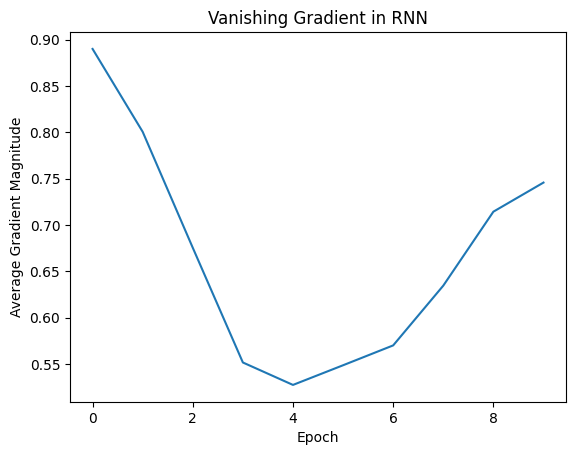

In [ ]:
# Build Simple RNN model
model1 = Sequential([
    Embedding(total_words, 5, input_length=max_length-1),
    SimpleRNN(50, return_sequences=True),
    SimpleRNN(50),
    Dense(total_words, activation='softmax')
])

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Function to track and print gradients
gradient_log1 = []

def get_gradients():
    with tf.GradientTape() as tape:
        y_pred = model1(X, training=True)
        loss = tf.keras.losses.categorical_crossentropy(y, y_pred)
    grads = tape.gradient(loss, model1.trainable_variables)

    # Get average gradient magnitude
    avg_grad = np.mean([np.mean(tf.abs(g)) for g in grads if g is not None])
    gradient_log1.append(avg_grad)

    # Print some gradient values for debugging
    print(f"Average Gradient Magnitude: {avg_grad:.8f}")
    return avg_grad

# Train and track gradients
for epoch in range(10):  # Train for 5 epochs
    print(f"Epoch {epoch+1}/{10}")
    model1.fit(X, y, epochs=1, verbose=1)
    get_gradients()  # Track gradients

# Plot gradients
plt.plot(gradient_log1)
plt.xlabel("Epoch")
plt.ylabel("Average Gradient Magnitude")
plt.title("Vanishing Gradient in RNN")
plt.show()

## **Building LSTM Model & Track Gradient**

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.0345 - loss: 3.0447
Average Gradient Magnitude: 0.10129462
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.1034 - loss: 3.0423
Average Gradient Magnitude: 0.10183038
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1034 - loss: 3.0399
Average Gradient Magnitude: 0.10332350
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.1034 - loss: 3.0372
Average Gradient Magnitude: 0.10534621
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.1034 - loss: 3.0342
Average Gradient Magnitude: 0.10786837
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.1034 - loss: 3.0307
Average Gradient Magnitude: 0.11088756
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1034 - loss: 3.0265
Average Gradient Magnitude: 0.11436979
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.1034 - loss: 3.0216
Average Gradient Magnitude: 0.11828396
Epoch 9/10
1/1 ━━━━━━━━━━━

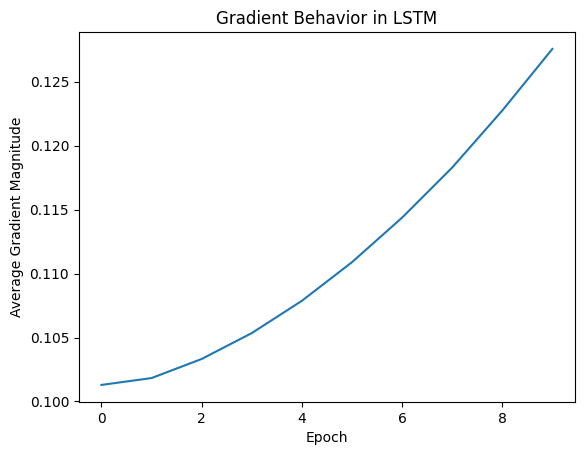

In [ ]:
# Build LSTM model
model2 = Sequential([
    Embedding(total_words, 5, input_length=max_length-1),
    LSTM(50, return_sequences=True),
    LSTM(50),
    Dense(total_words, activation='softmax')
])

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Function to track and print gradients
gradient_log2 = []

def get_gradients(X, y, model):
    with tf.GradientTape() as tape:
        y_pred = model(X, training=True)
        loss = tf.keras.losses.categorical_crossentropy(y, y_pred)
    grads = tape.gradient(loss, model.trainable_variables)

    # Get average gradient magnitude
    avg_grad = np.mean([np.mean(tf.abs(g)) for g in grads if g is not None])
    gradient_log2.append(avg_grad)

    # Print some gradient values for debugging
    print(f"Average Gradient Magnitude: {avg_grad:.8f}")
    return avg_grad

# Train and track gradients
for epoch in range(10):  # Train for 10 epochs
    print(f"Epoch {epoch+1}/10")
    model2.fit(X, y, epochs=1, verbose=1)
    get_gradients(X, y, model2)  # Track gradients after each epoch

# Plot gradients
plt.plot(gradient_log2)
plt.xlabel("Epoch")
plt.ylabel("Average Gradient Magnitude")
plt.title("Gradient Behavior in LSTM")
plt.show()

## **Predict Next Word**

In [ ]:
# Creating a function to take input of text to predict
def predict_next_word(seed_text, model):
    """
    Predicts the next word based on the input seed_text.
    """
    # Convert input text to a sequence of numbers
    sequence_text = tokenizer.texts_to_sequences([seed_text])[0]

    # Pad the sequence to match model input length
    sequence_pad = pad_sequences([sequence_text], maxlen=max_length-1, padding='pre')

    # Predict the next word
    predicted_probs = model.predict(sequence_pad, verbose=0)
    predicted_index = np.argmax(predicted_probs)  # Get word index with highest probability

    # Convert index back to word
    for word, index in tokenizer.word_index.items():
        if index == predicted_index:
            return word  # Return the predicted word

    return "Unknown"  # If word is not found

Input_text = input()

pd.DataFrame({'RNN Model Predicted word: ': [predict_next_word(Input_text, model1)],
              'LSTM Model Predicted word:': [predict_next_word(Input_text, model2)]
})

Rana likes biriyani so we can understand that


,RNN Model Predicted word:,LSTM Model Predicted word:
0,his,his
